<a href="https://colab.research.google.com/github/jiin124/Deep_learning/blob/main/3.%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

(train_data, train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index=imdb.get_word_index()#word_index는 단어와 정수 인덱스를 매핑한 딕셔너리

reverse_word_index=dict(
    [(value,key) for (key,value) in word_index.items()]
)
#정수와 인덱스와 단어를 매핑하도록 뒤집는다.

decoded_review=' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]
)
#리뷰를 디코딩 0,1,2는 패딩, 문서시작 사전에 없음을 위한 인덱스이므로 3을 뺀다.

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 데이터 준비

In [ ]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences): 
    results[i,sequence]=1.
  return results

x_train=vectorize_sequences(train_data)#훈련데이터를 벡터로 변환
x_test=vectorize_sequences(test_data)#테스트 데이터를 벡터로 변환

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

## 신경망 모델 만들기

In [ ]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 훈련검증

In [ ]:
#검증 세트 만들기
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5303 - acc: 0.7837 - val_loss: 0.4001 - val_acc: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3220 - acc: 0.9014 - val_loss: 0.3127 - val_acc: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2335 - acc: 0.9241 - val_loss: 0.3035 - val_acc: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1876 - acc: 0.9388 - val_loss: 0.2737 - val_acc: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1504 - acc: 0.9512 - val_loss: 0.2794 - val_acc: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1260 - acc: 0.9609 - val_loss: 0.3068 - val_acc: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1026 - acc: 0.9691 - val_loss: 0.3121 - val_acc: 0.8845
Epoch 8/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0883 - a

In [ ]:
history_dict=history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

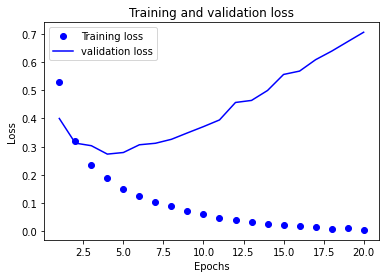

In [ ]:
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')#bo는 파란색 점
plt.plot(epochs,val_loss,'b',label='validation loss')#b는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

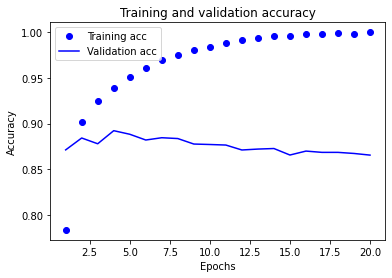

In [ ]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#모델을 처음부터 다시 훈련
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 3s 36ms/step - loss: 0.4807 - accuracy: 0.8182
Epoch 2/4
49/49 [==============================] - 2s 36ms/step - loss: 0.2747 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.2082 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2884 - accuracy: 0.8845


In [ ]:
results

[0.28837263584136963, 0.8844799995422363]

In [ ]:
model.predict(x_test)

array([[0.19566628],
       [0.9987292 ],
       [0.8201591 ],
       ...,
       [0.11047608],
       [0.09462848],
       [0.4627427 ]], dtype=float32)

### 3개의 은닉층 사용해보기

In [ ]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=20,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.4682 - accuracy: 0.8141
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2512 - accuracy: 0.9092
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1928 - accuracy: 0.9295
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1606 - accuracy: 0.9415
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1429 - accuracy: 0.9498
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1199 - accuracy: 0.9580
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1096 - accuracy: 0.9625
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.0947 - accuracy: 0.9686
Epoch 9/20
49/49 [==============================] - 1s 30ms/step - loss: 0.0801 - accuracy: 0.9738
Epoch 10/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0688 - accuracy: 0.9786
Epoch 11/

In [ ]:
results

[0.3076868951320648, 0.8795599937438965]

은닉층을 늘렸더니 성능이 더 떨어짐 


### 손실함수 mse 사용

In [ ]:
#모델을 처음부터 다시 훈련
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.1395 - accuracy: 0.8258
Epoch 2/4
49/49 [==============================] - 2s 36ms/step - loss: 0.0756 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.0579 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0873 - accuracy: 0.8809


In [ ]:
results

[0.08726546168327332, 0.8808799982070923]

아주쪽금 떨어짐

### tanh 활성화 함수 사용

In [ ]:
#모델을 처음부터 다시 훈련
model=models.Sequential()
model.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.1369 - accuracy: 0.8306
Epoch 2/4
49/49 [==============================] - 2s 36ms/step - loss: 0.0693 - accuracy: 0.9160
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.0507 - accuracy: 0.9366
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0953 - accuracy: 0.8750


In [ ]:
results

[0.09534069150686264, 0.8749600052833557]

# 뉴스 기사 분류 : 다중 분류 문제

In [ ]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(
    num_words=10000
)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
len(train_labels)

8982

## 데이터 준비

In [ ]:
#데이터 인코딩하기

import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

## 모델 구성

In [ ]:
#모델 정의

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 훈련검증

훈련데이터에서 1000개의 샘플을 따로 떼어서 검증 세트로 사용하겠다.

In [ ]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [ ]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.5310 - accuracy: 0.4853 - val_loss: 1.6923 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4101 - accuracy: 0.7015 - val_loss: 1.3290 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0682 - accuracy: 0.7626 - val_loss: 1.1628 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8511 - accuracy: 0.8136 - val_loss: 1.0654 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6775 - accuracy: 0.8550 - val_loss: 0.9963 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5457 - accuracy: 0.8855 - val_loss: 0.9425 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4352 - accuracy: 0.9112 - val_loss: 0.9517 - val_accuracy: 0.7860
Epoch 8/20
16

In [ ]:
history

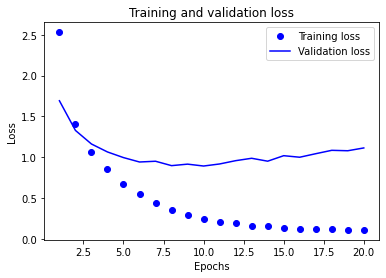

In [ ]:
#손실과 정확도 곡선그리기
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

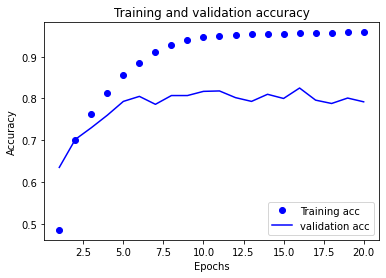

In [ ]:
plt.clf()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
history_dict=history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 2.6369 - accuracy: 0.5157 - val_loss: 1.7837 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.4621 - accuracy: 0.6928 - val_loss: 1.3346 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.0888 - accuracy: 0.7695 - val_loss: 1.1570 - val_accuracy: 0.7640
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8603 - accuracy: 0.8224 - val_loss: 1.0429 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6917 - accuracy: 0.8542 - val_loss: 0.9689 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5597 - accuracy: 0.8882 - val_loss: 0.9239 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4514 - accuracy: 0.9079 - val_loss: 0.9005 - val_accuracy: 0.8170
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9779915809631348, 0.7853962779045105]

In [ ]:
predictions=model.predict(x_test)

In [ ]:
#predictions의 각 항목은 길이가 46인 벡터이다
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])#원소합이 1이여야 하는데...;

1.0

In [ ]:
#가장 큰 값이 예측 클래스가 된다. 즉 가장 확률이 높은 클래스이다. 
np.argmax(predictions[0])

3

## 레이블과 손실을 다루는 다른 방법

In [ ]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## 충분히 큰 중간층을 두어야 하는 이유

In [ ]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 3.3483 - accuracy: 0.3914 - val_loss: 2.9179 - val_accuracy: 0.6290
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 2.6407 - accuracy: 0.6344 - val_loss: 2.5559 - val_accuracy: 0.6360
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 2.3155 - accuracy: 0.4956 - val_loss: 2.3711 - val_accuracy: 0.3920
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 2.0178 - accuracy: 0.4090 - val_loss: 2.0665 - val_accuracy: 0.3860
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4955 - accuracy: 0.6016 - val_loss: 1.4712 - val_accuracy: 0.6930
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0173 - accuracy: 0.7575 - val_loss: 1.2952 - val_accuracy: 0.7100
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.8903 - accuracy: 0.7803 - val_loss: 1.2786 - val_accuracy: 0.7110
Epoch 8/20
63

## 주택 가격 예측 : 회귀 문제


### 보스턴 주택 가격 데이터셋

In [15]:
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 데이터 준비

In [16]:
#데이터 정규화하기

mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

### 모델구성

In [41]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### K-겹 검증을 사용한 훈련검증

In [20]:
import numpy as np
k=4

num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
  print('처리중인 폴드 #',i)
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data=np.concatenate(## 훈련데이터 준비 : 다른 분할 전체
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0
  )
  partial_train_targets=np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0
  )

  model=build_model()# 케라스 모델 구성(컴파일 포함)
  model.fit(partial_train_data,partial_train_targets,#모델훈련(verbose=0이르모 훈련 과정이 출력되지 않는다.)
            epochs=num_epochs,batch_size=1,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)#검증세트로 모델 평가
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [21]:
all_scores

[2.313890218734741, 2.325404644012451, 2.8723976612091064, 2.4404067993164062]

In [22]:
np.mean(all_scores)

2.4880248308181763

In [23]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [42]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history["mae"]
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [43]:
average_mae_history=[
                     np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

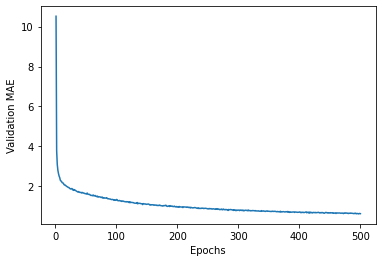

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

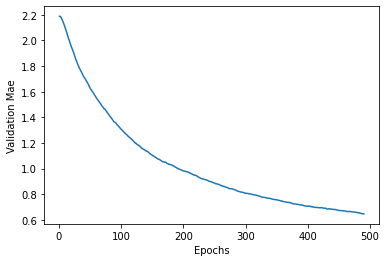

In [46]:
def smooth_curve(points,factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history=smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Mae')
plt.show()

In [47]:
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.2132 - mae: 2.7852


In [48]:
test_mae_score


2.7851555347442627